# Importing Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split as tts, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('uci breast cancer dataset.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df = df.drop(['id','Unnamed: 32'], axis = 'columns')

In [13]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<Axes: xlabel='diagnosis', ylabel='count'>

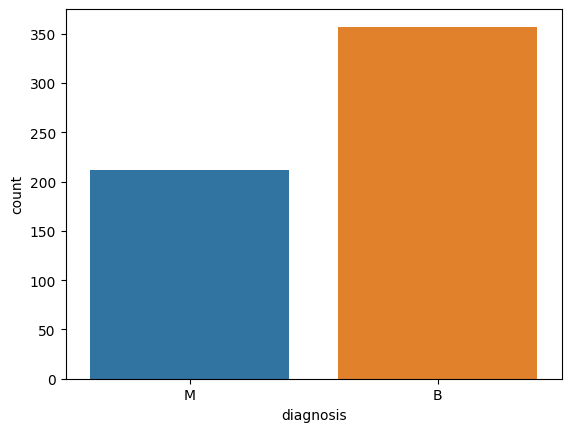

In [4]:
sns.countplot(x='diagnosis', data = df)

In [5]:
df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

# Train Test Split 

In [6]:
x = df.drop('diagnosis', axis = 1)
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
y = df [['diagnosis']]
y.head()

,diagnosis
0,M
1,M
2,M
3,M
4,M


In [9]:
xtrain,xtest,ytrain,ytest = tts(x,y,test_size = .3, random_state = 42)

# Decision Tree Implement & Evaluation 

In [12]:
dt_model = DecisionTreeClassifier(random_state = 42)
dt_model.fit(xtrain,ytrain)
dt_ypred = dt_model.predict(xtest)

In [13]:
dt_ypred

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

**Displaying model performance**

In [14]:
print('Decision Tree performance:')
print('Accuracy:', accuracy_score(ytest,dt_ypred))

Decision Tree performance:
Accuracy: 0.9415204678362573


In [15]:
print('Classification Model:')
print(classification_report(ytest,dt_ypred))

Classification Model:
              precision    recall  f1-score   support

           B       0.97      0.94      0.95       108
           M       0.90      0.95      0.92        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



# Random forest model Implement & Evaluation

In [16]:
rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(xtrain,ytrain)
rf_ypred = rf_model.predict(xtest)

In [17]:
rf_ypred

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

**Evaluation**

In [18]:
print('Random Forest Model Performance')
print('Accuracy:', accuracy_score(ytest,rf_ypred))


Random Forest Model Performance
Accuracy: 0.9707602339181286


In [19]:
print('Classification Report\n',classification_report(ytest,rf_ypred))

Classification Report
               precision    recall  f1-score   support

           B       0.96      0.99      0.98       108
           M       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



# Pre-Pruning for Cost Complexity

**hyperparameters initialization / optimization**

In [20]:
#decision tree parameters optimization
""""
class sklearn.tree.DecisionTreeClassifier
(*, criterion='gini', splitter='best', max_depth=None, 
min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
max_features=None, random_state=None, max_leaf_nodes=None, 
min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

"""
dt_params = {
    'criterion' : ['gini','entropy','log_loss'] ,
    'splitter' : ['best','random'],
    'max_depth' : [None,10,20,30],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4],
    
    
}

In [21]:
#Random forest parameters optimization
'''
class sklearn.ensemble.RandomForestClassifier
(n_estimators=100, *, criterion='gini', max_depth=None,
min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, 
bootstrap=True, oob_score=False, n_jobs=None, random_state=None, 
verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, 
max_samples=None)

'''

rf_params = {
    'n_estimators': [100, 200, 300], #https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html
    'criterion': ['gini', 'entropy','log_loss'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Perform Grid Search

**Grid Search for Decision tree**

In [22]:
dt_grid_search = GridSearchCV(estimator = DecisionTreeClassifier(random_state = 42),
                             param_grid = dt_params, cv = 5)
dt_grid_search.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [23]:
dt_grid_search.cv_results_

{'mean_fit_time': array([0.01830578, 0.        , 0.01562762, 0.        , 0.01875038,
        0.00624943, 0.01562414, 0.00937557, 0.01562476, 0.00625033,
        0.01562433, 0.        , 0.01829824, 0.00937715, 0.01562414,
        0.00624943, 0.0124999 , 0.00625043, 0.01250005, 0.00312467,
        0.01562486, 0.00625005, 0.01562552, 0.0031249 , 0.01562471,
        0.0062501 , 0.01672196, 0.00624995, 0.01562462, 0.00560465,
        0.0124989 , 0.        , 0.015625  , 0.00937557, 0.00937433,
        0.0062499 , 0.01562548, 0.        , 0.0156251 , 0.00312533,
        0.01596546, 0.00312624, 0.01562419, 0.00625072, 0.01992788,
        0.00312457, 0.01562576, 0.01249928, 0.01249943, 0.0062501 ,
        0.00624928, 0.00624952, 0.01250072, 0.0031249 , 0.01527476,
        0.        , 0.01802459, 0.00312605, 0.01244335, 0.0047637 ,
        0.01277776, 0.        , 0.01722283, 0.00312481, 0.01874957,
        0.00937562, 0.01249933, 0.00625005, 0.01532865, 0.00302238,
        0.01250124, 0.        ,

In [24]:
tuning_result_dt_gs = pd.DataFrame(dt_grid_search.cv_results_)
tuning_result_dt_gs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018306,0.002134,0.004440,0.002862,gini,None,1,2,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9125,0.8875,0.9000,0.936709,0.911392,0.909620,0.016292,173
1,0.000000,0.000000,0.006251,0.007656,gini,None,1,2,random,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9375,0.9000,0.9625,0.911392,0.949367,0.932152,0.023284,61
2,0.015628,0.000005,0.006251,0.007655,gini,None,1,5,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9125,0.8875,0.9250,0.936709,0.936709,0.919684,0.018414,145
3,0.000000,0.000000,0.006249,0.007653,gini,None,1,5,random,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9250,0.8875,0.9625,0.924051,0.962025,0.932215,0.028014,41
4,0.018750,0.006251,0.000000,0.000000,gini,None,1,10,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9375,0.8875,0.9250,0.911392,0.924051,0.917089,0.016945,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,0.006250,0.007654,0.000000,0.000000,log_loss,30,4,2,random,"{'criterion': 'log_loss', 'max_depth': 30, 'mi...",0.9125,0.8750,0.9625,0.949367,0.936709,0.927215,0.030883,97
212,0.012500,0.006250,0.006250,0.007655,log_loss,30,4,5,best,"{'criterion': 'log_loss', 'max_depth': 30, 'mi...",0.9500,0.8875,0.9625,0.949367,0.924051,0.934684,0.026696,9
213,0.000000,0.000000,0.006249,0.007654,log_loss,30,4,5,random,"{'criterion': 'log_loss', 'max_depth': 30, 'mi...",0.9125,0.8750,0.9625,0.949367,0.936709,0.927215,0.030883,97
214,0.014415,0.008105,0.003926,0.006052,log_loss,30,4,10,best,"{'criterion': 'log_loss', 'max_depth': 30, 'mi...",0.9250,0.8875,0.9625,0.949367,0.924051,0.929684,0.025681,65


In [25]:
dt_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'splitter': 'best'}

**Evaluate Decision Tree Optimized model**

In [26]:
# Decision Tree and Grid Search
y_pred_dt_gs = dt_grid_search.predict(xtest)
print("\nDecision Tree Grid Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_dt_gs))
print("Classification Report:")
print(classification_report(ytest, y_pred_dt_gs))


Decision Tree Grid Search Performance:
Accuracy: 0.9590643274853801
Classification Report:
              precision    recall  f1-score   support

           B       0.95      0.98      0.97       108
           M       0.97      0.92      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



**Grid Search for Random Forest**

In [27]:
rf_grid_search = GridSearchCV(estimator = RandomForestClassifier(random_state = 42),
                             param_grid = rf_params, cv = 5)
rf_grid_search.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [28]:
rf_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

**Evaluate Random Forest Grid Search**

In [32]:
# Random Forest and Grid Search
y_pred_rf = rf_grid_search.predict(xtest)
print("\nDecision Tree Grid Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_rf))
print("Classification Report:")
print(classification_report(ytest, y_pred_rf))


Decision Tree Grid Search Performance:
Accuracy: 0.9707602339181286
Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.98       108
           M       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



# Perform and Evaluation Randomized Search

**Randomized Search for Decision tree**

In [33]:
# perfrom randomized search for decision tree
'''''
class sklearn.model_selection.RandomizedSearchCV
(estimator, param_distributions, *, n_iter=10, 
scoring=None, n_jobs=None, refit=True, cv=None,
verbose=0, pre_dispatch='2*n_jobs', random_state=None, 
error_score=nan, return_train_score=False)
'''''
dt_rs = RandomizedSearchCV(estimator = DecisionTreeClassifier(random_state = 42), 
                           param_distributions = dt_params, n_iter = 10, cv = 5, random_state = 42)
dt_rs.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']},
                   random_state=42)

In [34]:
dt_rs.cv_results_

{'mean_fit_time': array([0.00390191, 0.00313148, 0.01561828, 0.        , 0.00937505,
        0.00312552, 0.01562481, 0.00312524, 0.00312486, 0.0062501 ]),
 'std_fit_time': array([6.66683583e-04, 6.26296997e-03, 1.38096849e-05, 0.00000000e+00,
        7.65469440e-03, 6.25104904e-03, 7.44843452e-07, 6.25047684e-03,
        6.24971390e-03, 7.65477225e-03]),
 'mean_score_time': array([0.00454192, 0.00625148, 0.        , 0.00625076, 0.        ,
        0.00625029, 0.00312505, 0.003125  , 0.00624852, 0.003125  ]),
 'std_score_time': array([0.00387319, 0.00765647, 0.        , 0.00765559, 0.        ,
        0.00765501, 0.0062501 , 0.00625   , 0.00765285, 0.00625   ]),
 'param_splitter': masked_array(data=['random', 'random', 'best', 'random', 'random',
                    'random', 'best', 'random', 'random', 'random'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_min_

In [35]:
dt_rs.best_params_

{'splitter': 'best',
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_depth': 30,
 'criterion': 'entropy'}

**Perforfance Evaluation Decision tree for Randomized Search**

In [36]:
y_pred_dt_rs = dt_rs.predict(xtest)
print('Decision Tree Randomized Search Performance:')
print('Accuracy', accuracy_score(ytest,y_pred_dt_rs))
print('Classification Report:\n',classification_report(ytest,y_pred_dt_rs))

Decision Tree Randomized Search Performance:
Accuracy 0.9590643274853801
Classification Report:
               precision    recall  f1-score   support

           B       0.95      0.99      0.97       108
           M       0.98      0.90      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



**Randomized Search for Random Forest**

In [37]:
rf_rs = RandomizedSearchCV(estimator = RandomForestClassifier(random_state = 42),
                          param_distributions = rf_params, cv = 5, random_state = 42)
rf_rs.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42)

In [38]:
rf_rs.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30,
 'criterion': 'gini'}

**Perforfance Evaluation Random Forest for Randomized Search**

In [39]:
y_pred_rf_rs = rf_rs.predict(xtest)
print('Decision Tree Randomized Search Performance:')
print('Accuracy', accuracy_score(ytest,y_pred_rf_rs))
print('Classification Report:\n',classification_report(ytest,y_pred_rf_rs))

Decision Tree Randomized Search Performance:
Accuracy 0.9707602339181286
Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.99      0.98       108
           M       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



# AdaBoost Classifier

In [9]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
'''''
class sklearn.ensemble.AdaBoostClassifier(
    estimator=None, *, n_estimators=50, learning_rate=1.0, 
    algorithm='SAMME.R', random_state=None, 
    base_estimator='deprecated')
    '''''

**AdaBoost Classifier**

In [43]:
adaBoost = AdaBoostClassifier(random_state =42)
adaBoost.fit(xtrain,ytrain)


AdaBoostClassifier(random_state=42)

In [28]:
adaBoost_ypred = adaBoost.predict(xtest)

In [29]:
print('AdaBoost Performance (estimator = Decision Tree):\n',)
print('Accuracy', accuracy_score(ytest,adaBoost_ypred))

AdaBoost Performance (estimator = Decision Tree):

Accuracy 0.9766081871345029


In [30]:
print('Classification Report:\n\n',classification_report(ytest,adaBoost_ypred))

Classification Report:

               precision    recall  f1-score   support

           B       0.98      0.98      0.98       108
           M       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



# AdaBoost Hyperparameter Optimization and Evaluation

**ADA Boost optimization using GRID search**

In [ ]:
'''''
class sklearn.ensemble.AdaBoostClassifier(
    estimator=None, *, n_estimators=50, learning_rate=1.0, 
    algorithm='SAMME.R', random_state=None, 
    base_estimator='deprecated')
    '''''

In [31]:
ada_params = {
    'n_estimators' : [100,200,300,400],
    'learning_rate' : [0.0001, 0.001, 0.1, 1.0],
    'algorithm' : ['SAMME', 'SAMME.R']
}

In [32]:
AdaBoost = AdaBoostClassifier(random_state = 42)
AdaBoost_gs = GridSearchCV(estimator = AdaBoost,param_grid = ada_params, cv = 5)
AdaBoost_gs.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.0001, 0.001, 0.1, 1.0],
                         'n_estimators': [100, 200, 300, 400]})

In [33]:
AdaBoost_gs.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 200}

**AdaBoost Grid search Performance Evaluation**

In [34]:
ypred_AdaBoost_gs = AdaBoost_gs.predict(xtest)
print('AdaBoost Grid Search Accuracy:\n\n', accuracy_score(ytest,ypred_AdaBoost_gs))

AdaBoost Grid Search Accuracy:

 0.9824561403508771


In [35]:
print('AdaBoost Grid Search Classification Report:\n\n', classification_report(ytest,ypred_AdaBoost_gs))

AdaBoost Grid Search Classification Report:

               precision    recall  f1-score   support

           B       0.99      0.98      0.99       108
           M       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



**ADA Boost optimization using RANDOMIZED search**

In [36]:
Ada_Boost = AdaBoostClassifier(random_state = 42)
AdaBoost_rs = RandomizedSearchCV(estimator = Ada_Boost, param_distributions = ada_params, 
                                 n_iter = 10, cv = 5)
AdaBoost_rs.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.0001, 0.001, 0.1,
                                                          1.0],
                                        'n_estimators': [100, 200, 300, 400]})

In [37]:
AdaBoost_rs.best_params_

{'n_estimators': 400, 'learning_rate': 1.0, 'algorithm': 'SAMME'}

**AdaBoost RANDOMIZED search Performance Evaluation**

In [38]:
ypred_AdaBoost_rs = AdaBoost_rs.predict(xtest)
print('AdaBoost RANDOMIZED Search Accuracy:\n\n', accuracy_score(ytest,ypred_AdaBoost_rs))

AdaBoost RANDOMIZED Search Accuracy:

 0.9883040935672515


In [39]:
print('AdaBoost RANDOMIZED Search Classification Report:\n\n', classification_report(ytest,ypred_AdaBoost_rs))

AdaBoost RANDOMIZED Search Classification Report:

               precision    recall  f1-score   support

           B       0.99      0.99      0.99       108
           M       0.98      0.98      0.98        63

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



# XGBOOST Classifier

In [10]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [11]:
LE = LabelEncoder()
y_encoded = LE.fit_transform(y)


In [12]:
xtrain,xtest,ytrain,ytest = tts(x,y_encoded,test_size = 0.3, random_state = 42)

In [61]:
xgBoost = XGBClassifier(random_state = 42)
xgBoost.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [62]:
ypred_xgboost = xgBoost.predict(xtest)

In [63]:
print('XGBoost Classifier Accuracy:', '\n\nAccuracy:',accuracy_score(ytest, ypred_xgboost))

XGBoost Classifier Accuracy: 

Accuracy: 0.9824561403508771


In [64]:
print('Classification Report:\n\n', classification_report(ytest,ypred_xgboost))

Classification Report:

               precision    recall  f1-score   support

           0       0.98      0.99      0.99       108
           1       0.98      0.97      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



# XGBOOST Hyperparameter Optimization and Evaluation

**XGBoost with Grid Search**

In [22]:
xgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.7, 0.8],
    'gamma': [0.0, 0.1, 0.2],
    'min_child_weight': [1, 2],
    'reg_alpha': [0.0, 0.1, 0.5],
    'reg_lambda': [0.0, 0.1, 0.5],
    }

In [28]:
xgb_gs = GridSearchCV(XGBClassifier(random_state = 42),xgb_params, cv = 5)
xgb_gs.fit(xtrain,ytrain)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.7, 0.8],
                         'gamma': [0.0, 0.1, 0.2],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 2],
                         'n_estimators': [100, 200, 300],
                         'reg_alpha': [0.0, 0.1, 0.5],
                         'reg_lambda': [0.0, 0.1, 0.5],
                         'subsample': [0.8, 0.9]})

In [29]:
xgb_gs.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.0,
 'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 1,
 'n_estimators': 300,
 'reg_alpha': 0.0,
 'reg_lambda': 0.1,
 'subsample': 0.8}

In [30]:
ypred_xgb_gs = xgb_gs.predict(xtest)

**XGBosst Evaluation and Accuracy for GRID Search**

In [31]:
print('XGBOOST Accuracy:', accuracy_score(ytest,ypred_xgb_gs))

XGBOOST Accuracy: 0.9766081871345029


In [32]:
print('Classification result of XGBOOST:\n\n', classification_report(ytest,ypred_xgb_gs))

Classification result of XGBOOST:

               precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



**XGBOOST Randomized Search**

In [23]:
xgb_rs = RandomizedSearchCV(estimator = XGBClassifier(random_state = 42), 
                            param_distributions = xgb_params, n_iter = 10, cv = 5)
xgb_rs.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=42, ...),
                   param_distributions={'colsample_bytree': [0.7, 0.8],
                                        'gamma': [0.0, 0.1, 0.2],
                                        'learning_rate': [0.1, 0.01, 0.001],
                                        'max_depth': [3, 5, 7],
                                        'min_child_weight': [1, 2],
                                        'n_estimators': [100, 200, 300],
                                        'reg_alpha': [0.0, 0.1, 0.5],
                                        'reg_lambda': [0.0, 0.1, 0.5],
                                        'subsample': [0.8, 0.9]})

In [24]:
xgb_rs.best_params_

{'subsample': 0.8,
 'reg_lambda': 0.0,
 'reg_alpha': 0.1,
 'n_estimators': 300,
 'min_child_weight': 1,
 'max_depth': 7,
 'learning_rate': 0.1,
 'gamma': 0.0,
 'colsample_bytree': 0.7}

In [25]:
ypred_xgb_rs = xgb_rs.predict(xtest)

**XGBosst Evaluation and Accuracy for RANDOMIZED Search**

In [26]:
print('XGBOOST Randomized Search Accuracy:', accuracy_score(ytest,ypred_xgb_rs))

XGBOOST Randomized Search Accuracy: 0.9707602339181286


In [27]:
print('Classification result of XGBOOST (Randomized Search):\n\n', classification_report(ytest,ypred_xgb_rs))

Classification result of XGBOOST (Randomized Search):

               precision    recall  f1-score   support

           0       0.97      0.98      0.98       108
           1       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

